# Our First Model: The Barotropic Gyre

#### Overview:
In this notebook, we will investigate the files and data that comprise the Barotropic Gyre experiment - a simple but typical MITgcm experiment.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

#### Define a path to the model


In [4]:
# enter your path here
model_path = '/Users/johnathonlu/Documents/SJSU/cs185c_spring2025/MITgcm/verification/tutorial_barotropic_gyre'

## The Model Grid
The model grid is one of the central components of any model. In MITgcm, the model grid is defined in a combination of compile-time files and run-time files. Fill in the following information based on data in the `code/SIZE/h` file and the `input/data` file:

In [5]:
# fill in the information here
n_rows = 62
n_cols = 62
dx = 20000
dy = 20000

Using the rows and columns, next make grids for the X and Y coordinates.

In [6]:
# make an x and y grid
x = np.arange(0,n_cols*dx,dx)
y = np.arange(0,n_rows*dy,dy)
X,Y = np.meshgrid(x,y)

# print the shape of X and Y
print(np.shape(X), np.shape(Y))

(62, 62) (62, 62)


After you have determined the size of the grid, run the following plotting code to visualize the computational grid:

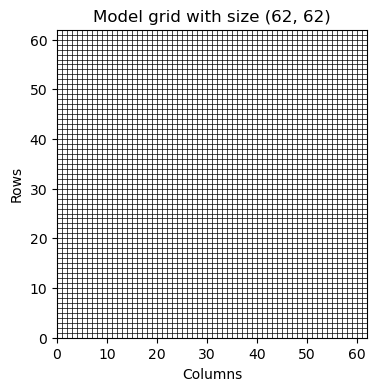

In [7]:
# define the cell edges
x_cell_edges = np.arange(n_cols+1)
y_cell_edges = np.arange(n_rows+1)

# plot the grid
fig = plt.figure(figsize = (4,4))
for i in range(n_cols+1):
    plt.plot(x_cell_edges[i]*np.ones((n_rows+1,)), y_cell_edges, 'k-', linewidth=0.5)
for j in range(n_rows+1):
    plt.plot(x_cell_edges, y_cell_edges[j]*np.ones((n_cols+1,)), 'k-', linewidth=0.5)
    
# format and show
plt.gca().set_xlim([0,n_cols])
plt.gca().set_ylim([0,n_rows])
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model grid with size ('+str(n_rows)+', '+str(n_cols)+')')
plt.show()

### Visualize the bathymetry
Read and plot the bathymetry of the model from the `bathy.bin` file.

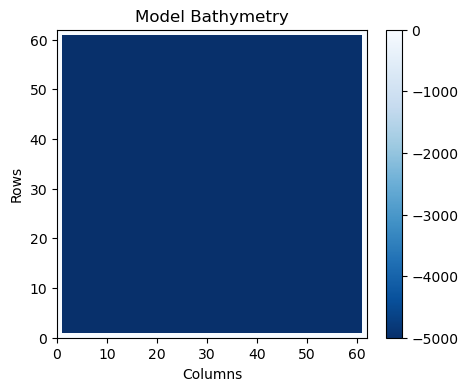

In [8]:
# define the bathymetry file
bathy_file = os.path.join(model_path, 'input', 'bathy.bin')

# read in the bathymetry grid
bathy_grid = np.fromfile(bathy_file, '>f4').reshape((n_rows, n_cols))
# print(np.shape(bathy_grid)) # 62*62 elements


# plot the bathymetry
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(bathy_grid, cmap='Blues_r')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Bathymetry')
plt.show()

### Visualize the Wind Forcing
Read and plot the wind forcing of the model from the `windx_cosy.bin` file.

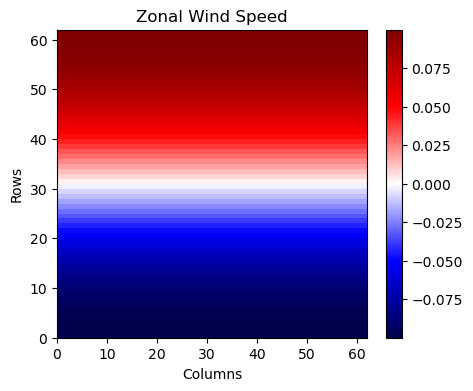

In [9]:
# define the wind file
# define the bathymetry file
wind_file = os.path.join(model_path, 'input', 'windx_cosy.bin')

# read in the wind grid
wind_grid = np.fromfile(wind_file, '>f4').reshape((n_rows, n_cols))
# print(np.shape(wind_grid))

# plot the wind
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(wind_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Wind Speed')
plt.show()

#### &#x1F914; Question for consideration:
What direction is the wind blowing?

## Assessing Model Output
After running the model, we will have many fields availabile at our finger tips. Let's plot the ocean current fields at a time of 10 timesteps:

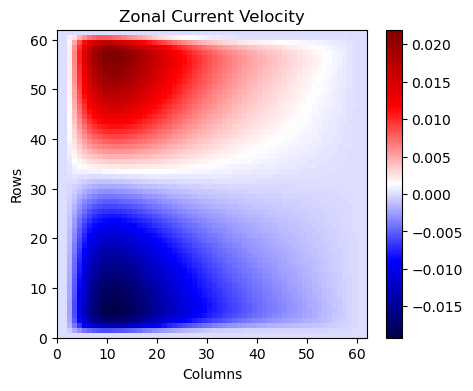

In [13]:
# define the zonal current velocity file
zonal_file = os.path.join(model_path, 'run', 'U.0000000010.001.001.data')

# read in the zonal current velocity grid
u_grid = np.fromfile(zonal_file, '>f4').reshape((n_rows, n_cols))

# plot the zonal current velocity
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(u_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Current Velocity')
plt.show()

Similarly, plot the meridional velocity:

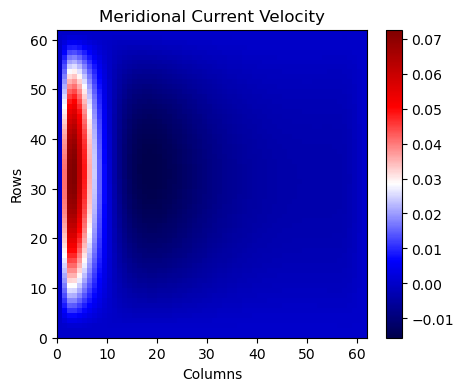

In [14]:
# define the meridional current velocity file
meridional_file = os.path.join(model_path, 'run', 'V.0000000010.001.001.data')

# read in the meridional current velocity grid
v_grid = np.fromfile(meridional_file, '>f4').reshape((n_rows, n_cols))

# plot the meridional current velocity
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(v_grid, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Meridional Current Velocity')
plt.show()

# east coast of US and the west coast of europe

#### &#x1F914; Question for consideration:
What direction is the current moving?

Plotting current velocity gives us a sense of the components. Often, it is helpful to visualize this in terms of the overall speed and current direction. Use the code block below to plot speed along with streamlines for the current direction.

/tmp/ipykernel_8911/2731069093.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 500x400 with 6 Axes> than <Figure size 500x400 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(C)


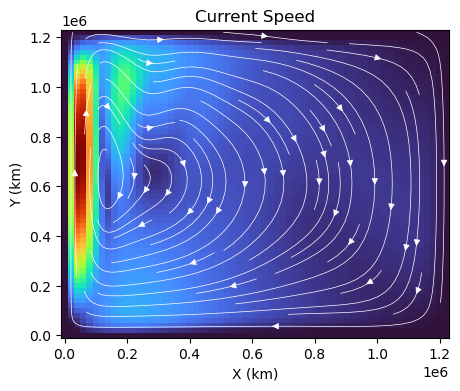

In [18]:
# compute the speed as a grid
speed = (u_grid**2 + v_grid**2)**0.5

# plot the speed
fig = plt.figure(figsize = (5,4))
plt.pcolormesh(X,Y, speed, cmap='turbo')

# plot the stream function of the grid
plt.streamplot(X,Y, u_grid, v_grid, linewidth=0.5, color='white')

# format the figure
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()

In [20]:
#timesteps for 1 year

dt = 1200 #seconds
seconds_in_a_year = 365 * 24*60*60 #seconds
month_seconds = 30 * 24*60*60 #seconds
number_time_steps = seconds_in_a_year / dt
month_time_steps = month_seconds * dt
print(number_time_steps)
print(month_time_steps)

26280.0
3110400000


### Model Results after 1 Year
The current reaches approximate equilibrium after flowing for a long period of time - say 1 year or more. Modify the model to run the code for one year and then use the code below to plot the current speed and sea surface height.

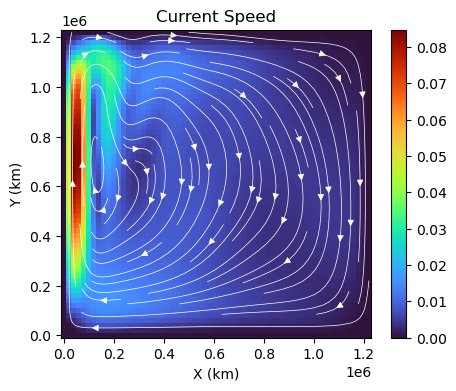

In [23]:
# define the zonal velocity file after one year
u_file = os.path.join(model_path, 'run', 'U.0000026280.data')

# define the meridional velocity file after one year
v_file = os.path.join(model_path, 'run', 'V.0000026280.data')

# read in the zonal and meridional current velocity grids
u_grid = np.fromfile(u_file, '>f4').reshape(n_rows,n_cols)
v_grid = np.fromfile(v_file, '>f4').reshape(n_rows,n_cols)

# compute the speed as a grid
speed_grid = (u_grid**2 + v_grid**2)**0.5

# plot the speed with streamlines
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(X, Y, speed_grid, cmap='turbo')
plt.streamplot(X, Y, u_grid, v_grid, linewidth=0.5, color='white')
plt.colorbar(C)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Current Speed')
plt.show()

#### &#x1F914; Questions for consideration:
1. How does the current pattern change after 1 year?
2. How does this compare to gyre currents in the real ocean?

### Sea Surface Height
Ocean currents modify the shape of the sea surface. In MITgcm, the sea surface shape is given by `Eta`. Plot the `Eta` grid below corresponding to the timesteps after 1 year.

In [ ]:
# define the sea surface height file


# read in the sea surface height grid


# plot the sea surface height
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(eta_grid, cmap='turbo')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Sea Surface Height')
plt.show()